# Personal Information
Name: **Mees Apeldoorn**

StudentID: **13224069**

Email: [**Mees.Apeldoorn@student.uva.nl**](youremail@student.uva.nl)

Submitted on: **21.03.2024**

# Data

### The Next Generation: a 5G Dataset with Channel and Context Metrics

 This dataset is generated from two mobility patterns (static and car), and across two application patterns(video streaming and file download). The dataset is composed of client-side cellular key performance indicators (KPIs) comprised of channel-related metrics, context-related metrics, cell-related metrics and throughput information. These metrics are generated from a well-known non-rooted Android network monitoring application, G-NetTrack Pro. To the best of our knowledge, this is the first publicly available dataset that contains throughput, channel and context information for 5G networks.

dataset:
 https://github.com/uccmisl/5Gdataset

paper:
https://cora.ucc.ie/items/4574b0c6-f441-4323-a0dd-5deda43453ec

### A 4G LTE dataset with channel and context metrics

A 4G trace dataset composed of client-side cellular key performance indicators (KPIs) collected from two major Irish mobile operators, across different mobility patterns (static, pedestrian, car, bus and train). The 4G trace dataset contains 135 traces, with an average duration of fifteen minutes per trace, with viewable throughput ranging from 0 to 173 Mbit/s at a granularity of one sample per second. Our traces are generated from a well-known non-rooted Android network monitoring application, GNetTrack Pro. This tool enables capturing various channel related KPIs, context-related metrics, downlink and uplink throughput, and also cell-related information.

dataset:
https://www.kaggle.com/datasets/aeryss/lte-dataset

paper:
https://cora.ucc.ie/items/b86aca50-bc76-4c68-8626-f50a43df944e

# Data Description


In [37]:
# Imports
import datetime
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import scipy
from directory_tree import display_tree
%matplotlib inline
plt.style.use('bmh')

### Data Loading

In [38]:
display_tree('Data/',max_depth=3)
# The 4G dataset does not provide a type of data being used, so i assume it to be just Download of any type.

Data/
├── 4G-LTE-dataset/
│   └── Download/
│       ├── bus/
│       ├── car/
│       ├── pedestrian/
│       ├── static/
│       └── train/
└── 5G-production-dataset/
    ├── Amazon_Prime/
    │   ├── Driving/
    │   └── Static/
    ├── Download/
    │   ├── Driving/
    │   └── Static/
    └── Netflix/
        ├── Driving/
        └── Static/


We can combine all seperate files in this 'Data' directory into one big CSV, since ther share a lot of columns

In [39]:
def combine_files_in_directory(directory):
    dfs = []
    current_file = 0
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        current_file +=1
        if os.path.isfile(file_path):
            df = pd.read_csv(file_path)  # Adjust parameters if files are not CSV
            # Add a column to identify the type of data (based on the directory name)
            path_components = directory.split('\\')
            if len(path_components) > 3:
                df['data_type'] = path_components[2]
                df['transportation_type'] = path_components[3]
            df['trace_id'] = os.path.splitext(filename)[0]
            dfs.append(df)
            
        # Check if the item is a directory
        elif os.path.isdir(file_path):
            dfs.extend(combine_files_in_directory(file_path))

    return dfs



base_dir = 'Data'
# Combine files from all subdirectories in the base directory
combined_dfs = combine_files_in_directory(base_dir)

# Concatenate all DataFrames into one
combined_df = pd.concat(combined_dfs, ignore_index=True)
combined_df

,Timestamp,Longitude,Latitude,Speed,Operatorname,CellID,NetworkMode,RSRP,RSRQ,SNR,...,Unnamed: 0,PINGAVG,PINGMIN,PINGMAX,PINGSTDEV,PINGLOSS,CELLHEX,NODEHEX,LACHEX,RAWCELLID
0,2017.11.30_16.48.26,-8.501373,51.893359,0.0,A,2.0,LTE,-102.0,-12,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017.11.30_16.48.26,-8.501291,51.893462,1.0,A,2.0,LTE,-102.0,-12,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017.11.30_16.48.27,-8.501291,51.893462,1.0,A,2.0,LTE,-102.0,-12,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017.11.30_16.48.28,-8.501291,51.893462,1.0,A,2.0,LTE,-102.0,-12,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017.11.30_16.48.29,-8.501291,51.893462,1.0,A,2.0,LTE,-102.0,-13,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363229,2019.12.16_13.36.25,-8.394601,51.886139,0.0,B,11.0,5G,-101.0,-13,-7.0,...,NaN,-,-,-,-,-,B,A4DF,9CBA,10805003.0
363230,2019.12.16_13.36.27,-8.394601,51.886139,0.0,B,11.0,5G,-101.0,-13,-7.0,...,NaN,-,-,-,-,-,B,A4DF,9CBA,10805003.0
363231,2019.12.16_13.36.28,-8.394601,51.886139,0.0,B,11.0,5G,-103.0,-12,5.0,...,NaN,-,-,-,-,-,B,A4DF,9CBA,10805003.0
363232,2019.12.16_13.36.29,-8.394601,51.886139,0.0,B,11.0,5G,-103.0,-12,5.0,...,NaN,-,-,-,-,-,B,A4DF,9CBA,10805003.0


### Cleaning data

In [40]:
print(combined_df['data_type'].unique())
print(combined_df['transportation_type'].unique())
# Driving and car should be the same, so does Static and static.

['Download' 'Amazon_Prime' 'Netflix']
['bus' 'car' 'pedestrian' 'static' 'train' 'Driving' 'Static']


In [41]:
def preprocess_transportation_type(value):
    if value.lower() == 'driving':
        return 'car'
    else:
        return value.lower()

In [42]:
#Select only relevant columns
#RSRP, RSRQ, SNR, CQI, RSSI are all key performance metrics (KPI)
combined_df = combined_df[['Timestamp', 'Speed', 'CellID', 'NetworkMode', 'RSRP', 'RSRQ',
               'SNR', 'CQI', 'RSSI', 'DL_bitrate', 'State', 'data_type', 'transportation_type', 'trace_id']]

# force NaN values for empty entries
combined_df = combined_df.applymap(lambda x: x if x != "-" else np.NaN) 
combined_df['transportation_type'] = combined_df['transportation_type'].apply(preprocess_transportation_type)
combined_df['data_type'] = combined_df['data_type'].apply(preprocess_transportation_type)

#Convert types for all collumns
combined_df = combined_df.convert_dtypes()
combined_df['NetworkMode'] = combined_df['NetworkMode'].astype("string")
combined_df[['RSRP', 'RSRQ', 'SNR', 'CQI', 'RSSI', 'DL_bitrate']] = combined_df[['RSRP', 'RSRQ', 'SNR', 'CQI', 'RSSI', 'DL_bitrate']].apply(pd.to_numeric)

combined_df

,Timestamp,Speed,CellID,NetworkMode,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate,State,data_type,transportation_type,trace_id
0,2017.11.30_16.48.26,0,2,LTE,-102,-12.0,10.0,7.0,-85.0,3,D,download,bus,A_2017.11.30_16.48.26
1,2017.11.30_16.48.26,1,2,LTE,-102,-12.0,10.0,7.0,-85.0,3,D,download,bus,A_2017.11.30_16.48.26
2,2017.11.30_16.48.27,1,2,LTE,-102,-12.0,7.0,10.0,-87.0,310,D,download,bus,A_2017.11.30_16.48.26
3,2017.11.30_16.48.28,1,2,LTE,-102,-12.0,7.0,7.0,-85.0,0,I,download,bus,A_2017.11.30_16.48.26
4,2017.11.30_16.48.29,1,2,LTE,-102,-13.0,8.0,7.0,-85.0,0,I,download,bus,A_2017.11.30_16.48.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363229,2019.12.16_13.36.25,0,11,5G,-101,-13.0,-7.0,10.0,-85.0,1,D,netflix,static,B_2019.12.16_13.03.47
363230,2019.12.16_13.36.27,0,11,5G,-101,-13.0,-7.0,11.0,-88.0,0,D,netflix,static,B_2019.12.16_13.03.47
363231,2019.12.16_13.36.28,0,11,5G,-103,-12.0,5.0,11.0,-88.0,15,D,netflix,static,B_2019.12.16_13.03.47
363232,2019.12.16_13.36.29,0,11,5G,-103,-12.0,5.0,11.0,-88.0,4,D,netflix,static,B_2019.12.16_13.03.47


lets see how many values are nan per trace, together with the total length of the traces

In [43]:
grouped = combined_df.groupby('trace_id')

nan_count_per_trace = grouped.apply(lambda x: x.isna().sum())
total_length_per_trace = grouped.size().rename('total_length')

result = pd.concat([nan_count_per_trace, total_length_per_trace], axis=1)
result

,Timestamp,Speed,CellID,NetworkMode,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate,State,data_type,transportation_type,trace_id,total_length
trace_id,,,,,,,,,,,,,,,
A_2017.11.21_15.03.50,0,0,0,0,0,0,0,0,124,0,0,0,0,0,1571
A_2017.11.21_15.35.33,0,0,0,0,0,0,0,0,112,0,0,0,0,0,1509
A_2017.11.21_17.35.54,0,0,0,0,0,0,0,0,54,0,0,0,0,0,956
A_2017.11.22_07.57.13,0,0,0,0,0,0,0,0,40,0,0,0,0,0,709
A_2017.11.22_10.06.58,0,0,0,0,0,0,0,0,3,0,0,0,0,0,2623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B_2020.02.14_12.58.17,0,0,0,0,0,672,672,672,672,0,0,0,0,0,960
B_2020.02.14_13.21.26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1013
B_2020.02.27_17.30.15,0,0,0,0,0,632,632,632,632,0,0,0,0,0,866


Some traces contain a very large number of NaN values, for all of RSRQ, SNR, CQI, RSSI. It might be smart to remove these traces, which have above 50% NaN values.

In [44]:
nan_percentage = combined_df.groupby('trace_id')[['RSRQ', 'SNR', 'CQI', 'RSSI']].apply(lambda x: x.isna().mean())
trace_ids_to_remove = nan_percentage[nan_percentage.mean(axis=1) > 0.5].index
cleaned_df = combined_df[~combined_df['trace_id'].isin(trace_ids_to_remove)]
cleaned_df

,Timestamp,Speed,CellID,NetworkMode,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate,State,data_type,transportation_type,trace_id
0,2017.11.30_16.48.26,0,2,LTE,-102,-12.0,10.0,7.0,-85.0,3,D,download,bus,A_2017.11.30_16.48.26
1,2017.11.30_16.48.26,1,2,LTE,-102,-12.0,10.0,7.0,-85.0,3,D,download,bus,A_2017.11.30_16.48.26
2,2017.11.30_16.48.27,1,2,LTE,-102,-12.0,7.0,10.0,-87.0,310,D,download,bus,A_2017.11.30_16.48.26
3,2017.11.30_16.48.28,1,2,LTE,-102,-12.0,7.0,7.0,-85.0,0,I,download,bus,A_2017.11.30_16.48.26
4,2017.11.30_16.48.29,1,2,LTE,-102,-13.0,8.0,7.0,-85.0,0,I,download,bus,A_2017.11.30_16.48.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363229,2019.12.16_13.36.25,0,11,5G,-101,-13.0,-7.0,10.0,-85.0,1,D,netflix,static,B_2019.12.16_13.03.47
363230,2019.12.16_13.36.27,0,11,5G,-101,-13.0,-7.0,11.0,-88.0,0,D,netflix,static,B_2019.12.16_13.03.47
363231,2019.12.16_13.36.28,0,11,5G,-103,-12.0,5.0,11.0,-88.0,15,D,netflix,static,B_2019.12.16_13.03.47
363232,2019.12.16_13.36.29,0,11,5G,-103,-12.0,5.0,11.0,-88.0,4,D,netflix,static,B_2019.12.16_13.03.47


### Data distribution

now that we have cleaned up a big part of the data, lets have a look at the distribution of some of these values and create some plots

In [45]:
cleaned_df.describe()

,Speed,CellID,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate
count,303650.000000,303650.000000,303650.000000,301726.000000,279267.000000,279268.000000,233168.000000,303650.000000
mean,17.107285,2974.144324,-92.354589,-11.704149,3.997544,9.941379,-79.064301,11926.963896
std,21.444427,11302.059796,13.343542,3.848328,7.529942,3.204256,13.033747,30426.668319
min,0.000000,0.000000,-200.000000,-26.000000,-30.000000,0.000000,-113.000000,0.000000
25%,0.000000,2.000000,-101.000000,-14.000000,-1.000000,7.000000,-88.000000,0.000000
50%,3.000000,11.000000,-95.000000,-12.000000,3.000000,10.000000,-80.000000,1848.000000
75%,34.000000,11.000000,-84.000000,-10.000000,8.000000,12.000000,-70.000000,11125.000000
max,115.000000,64262.000000,-27.000000,4.000000,35.000000,15.000000,-31.000000,532905.000000


In [46]:
print(cleaned_df['trace_id'].value_counts())
print(cleaned_df['NetworkMode'].value_counts())
print(cleaned_df['transportation_type'].value_counts())
print(cleaned_df['data_type'].value_counts())
print(cleaned_df['Speed'].value_counts())


B_2019.12.03_08.02.05    7190
B_2019.12.23_10.30.35    6992
B_2020.01.06_11.40.29    6581
B_2020.01.03_08.59.40    6143
B_2019.12.06_09.55.13    6020
                         ... 
A_2018.01.25_18.02.07     414
A_2017.12.09_14.04.02     397
B_2020.01.16_12.10.03     384
A_2018.01.25_19.50.40     348
B_2019.11.21_10.20.17     268
Name: trace_id, Length: 184, dtype: Int64
LTE      143477
5G       135794
HSPA+     20320
UMTS       1933
HSUPA      1871
EDGE        132
HSDPA       122
GPRS          1
Name: NetworkMode, dtype: Int64
car           154623
static        100427
pedestrian     32749
bus             8713
train           7138
Name: transportation_type, dtype: Int64
download        159166
netflix          72832
amazon_prime     71652
Name: data_type, dtype: Int64
0      109968
3       18305
1       17954
2        7514
4        6665
        ...  
104        33
99         32
101        10
105         9
102         8
Name: Speed, Length: 109, dtype: Int64


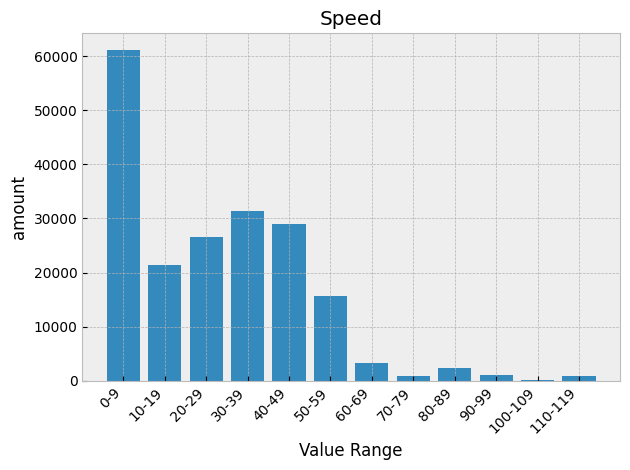

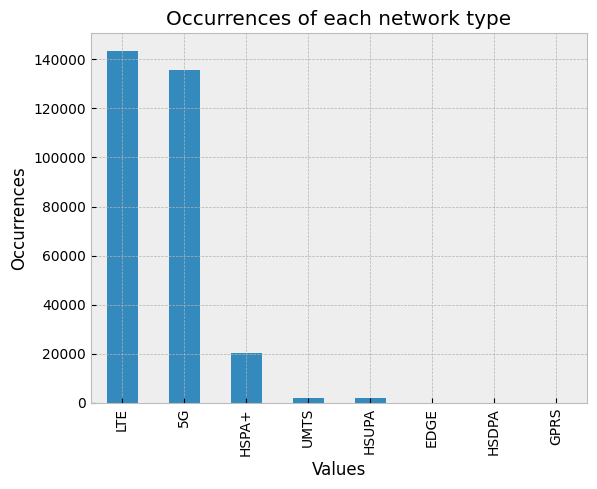

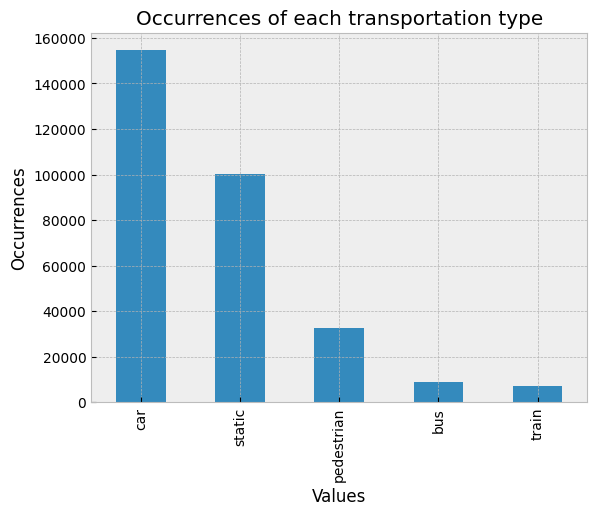

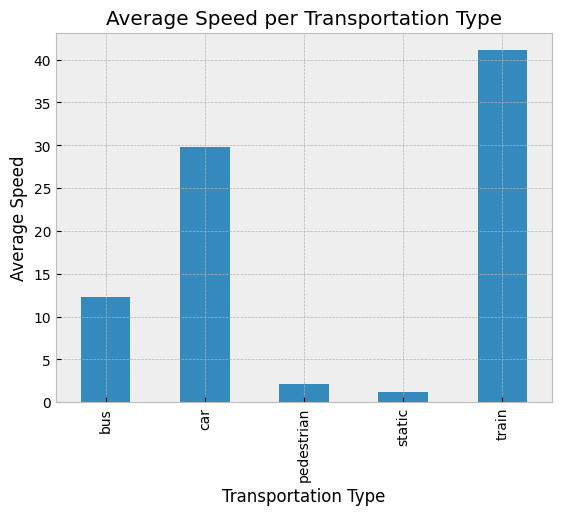

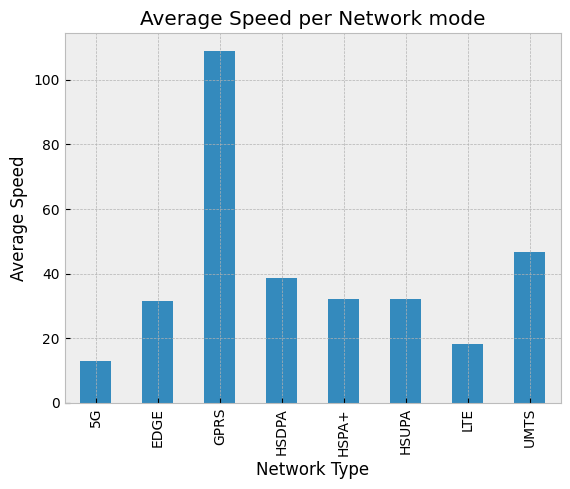

In [51]:
# Create bins for grouping values
bins = range(0, max(cleaned_df['Speed'])+10, 10)

# Group values into bins
groups = cleaned_df['Speed'].groupby(pd.cut(cleaned_df['Speed'], bins=bins)).count()

# Plot the barplot
plt.bar(range(len(groups)), groups.values, tick_label=[f'{int(b.left)}-{int(b.right-1)}' for b in groups.index])
plt.xlabel('Value Range')
plt.ylabel('amount')
plt.title('Speed')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label overlapping
plt.show()

cleaned_df['NetworkMode'].value_counts().plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Occurrences')
plt.title('Occurrences of each network type')
plt.show()

cleaned_df['transportation_type'].value_counts().plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Occurrences')
plt.title('Occurrences of each transportation type')
plt.show()

cleaned_df.groupby("transportation_type")["Speed"].mean().plot(kind="bar")
plt.xlabel("Transportation Type")
plt.ylabel("Average Speed")
plt.title("Average Speed per Transportation Type")
plt.show()

cleaned_df.groupby("NetworkMode")["Speed"].mean().plot(kind="bar")
plt.xlabel("Network Type")
plt.ylabel("Average Speed")
plt.title("Average Speed per Network mode")
plt.show()


The data is seperated relatively evenly. There are a few older network types represented in small numbers, which could probably be removed. such as HSUPA, EDGE, HSDPA, GPRS. These are 3G or even 2G technologies that are only used when 4G (LTE) or 5G is not available. HSPA+ is a intermediate between 4G and 3G, and can possibly also be discarded. 

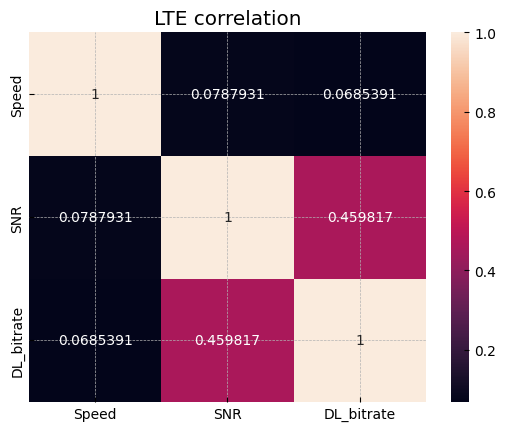

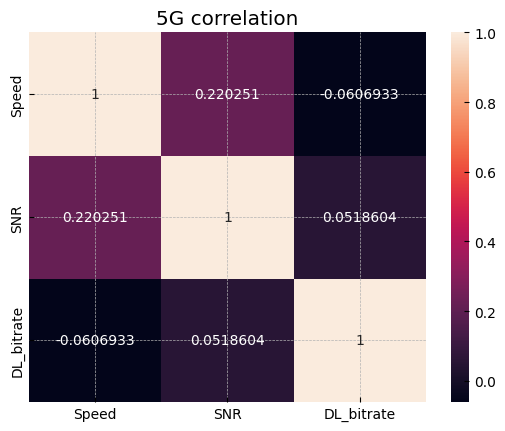

In [48]:
analysis_df = cleaned_df[cleaned_df['State']=='D']
cov_matrix = analysis_df[analysis_df['NetworkMode'] == 'LTE'][['Speed', 'SNR', 'DL_bitrate']].corr()
sns.heatmap(cov_matrix, annot=True, fmt='g')
plt.title("LTE correlation")
plt.show()

cov_matrix = analysis_df[analysis_df['NetworkMode'] == '5G'][['Speed', 'SNR', 'DL_bitrate']].corr()
sns.heatmap(cov_matrix, annot=True, fmt='g')
plt.title("5G correlation")
plt.show()